# Simple Linear Regrassion

## Importing the libraries


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [61]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Spliting the dataset into test and train set

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state= 42)

## Training the SLR model on the training set

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set result

In [64]:
y_pred = regressor.predict(X_test)

In [65]:
print(y_pred)

[115814.30756236  71511.92534771 102617.85328566  75282.34085534
  55487.65944028  60200.67882482 122412.53470072 107330.8726702
  63028.49045554  35692.97802523]


In [66]:
print(y_test)

[112635.  67938. 113812.  83088.  64445.  57189. 122391. 109431.  56957.
  39343.]


## How the model predict

This is the coefficient. means the (b - not)

In [67]:
print(regressor.coef_)

[9426.03876907]


This is intercept. (b - one)

In [68]:
print(regressor.intercept_)

25324.33537924433


## Predict a new value

In [69]:
print(regressor.predict([[12]]))

[138436.80060814]


## Visualizing the training set results

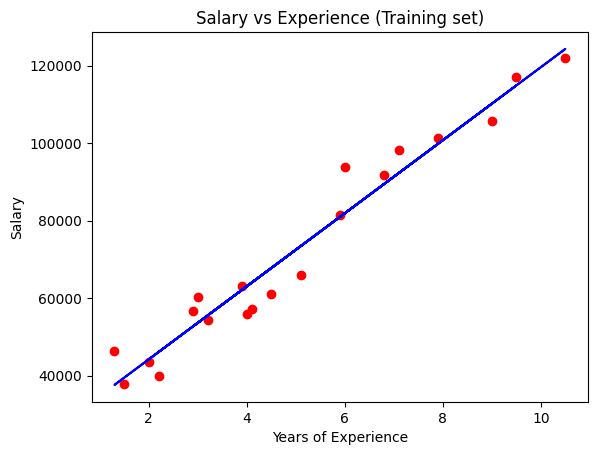

In [70]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualizing the test set result

In [71]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

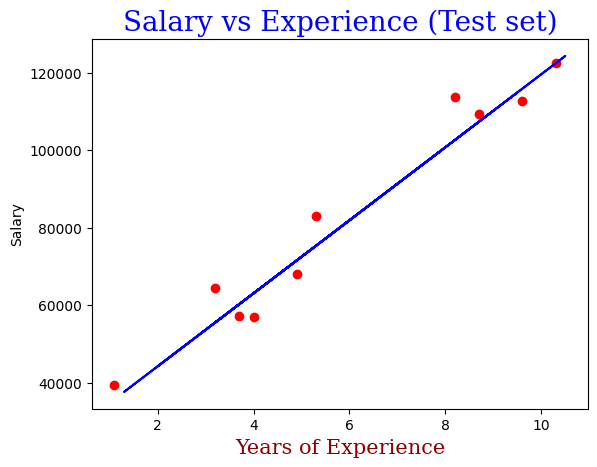

In [72]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)', fontdict = font1)
plt.xlabel('Years of Experience', fontdict = font2)
plt.ylabel('Salary')
plt.show()

## Statiscical Significance of the model

In [73]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           1.45e-13
Time:                        10:37:01   Log-Likelihood:                -200.48
No. Observations:                  20   AIC:                             405.0
Df Residuals:                      18   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.532e+04   2743.538      9.231      0.000    1.96e+04    3.11e+04
x1          9426.0388    482.706     19.527      0.000    8411.911    1.04e+04
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.819
Skew:                           0.380   Prob(JB):                        0.664
Kurtosis:                       2.363   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Training the model on the full dataset using the statemodels.api

In [74]:
X_sm = sm.add_constant(X)
lr = sm.OLS(y, X_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           1.14e-20
Time:                        10:37:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* OLS- ordinary list squared
* y - dependent variable
* R-squared - coefficient of determination
  - how much variablily of the dependent function is explained by  the independent variable. Goodness of the fit of the model. Model is better. Pearson corelation ->r then squared this.
* Adjusted R-squared : https://www.datacamp.com/tutorial/adjusted-r-squared
  - coliniarity damage fix.

### Pearson's Corelation

In [79]:
from scipy.stats import pearsonr
pearsonr(dataset["YearsExperience"], dataset["Salary"])
# Shows the coreelation of the two feature

PearsonRResult(statistic=np.float64(0.9782416184887599), pvalue=np.float64(1.1430681092271562e-20))

In [80]:
# This is the R-Squared
round(0.9782416184887599**2, 3)

0.957